In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import re

In [9]:
# create pandas df
        
        #from pandas_credentials import data
df = pd.read_csv('/Users/juanhernandez/Desktop/VS Code Python/Data/acutecare_smallcell.csv')

#from pandas_credentials import data

df.drop(columns = ['DataQuality'], inplace = True)

for x in df['Month']:
    i = str(x)
    l = len(i)
    df['Month'].replace(x,int(i[l - 2:]), inplace = True)

for x in df['ServiceCount']:
    if x == 'DS':
        df['ServiceCount'].replace(x,0, inplace = True)

for x in df['RatePer1000Beneficiaries']:
    if x == 'DS':
        df['RatePer1000Beneficiaries'].replace(x,0, inplace = True)

df['ServiceCount'] = df['ServiceCount'].astype(str).astype(int)
df['RatePer1000Beneficiaries'] = df['RatePer1000Beneficiaries'].astype(str).astype(float)

df.rename(columns = {'Condition':'Diseases'}, inplace = True)
df.rename(columns = {'RatePer1000Beneficiaries':'RatePerB'}, inplace = True)



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15264 entries, 0 to 15263
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             15264 non-null  object 
 1   Year              15264 non-null  int64  
 2   Month             15264 non-null  int64  
 3   Diseases          15264 non-null  object 
 4   AcuteCareService  15264 non-null  object 
 5   ServiceCount      15264 non-null  int64  
 6   RatePerB          15264 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 834.9+ KB


In [51]:
df


,State,Year,Month,Diseases,AcuteCareService,ServiceCount,RatePerB,Date
0,Alabama,2018,1,Any condition,ED visits,146062,118.7,2019.0
1,Alabama,2018,1,Any condition,ICU stays,2616,2.1,2019.0
2,Alabama,2018,1,Any condition,ICU stays with ventilator use,418,0.3,2019.0
3,Alabama,2018,1,Any condition,Inpatient stays,13424,10.9,2019.0
4,Alabama,2018,1,COVID-19 condition,ED visits,0,0.0,2019.0
...,...,...,...,...,...,...,...,...
15259,Wyoming,2020,12,Any condition,Inpatient stays,747,10.4,NaN
15260,Wyoming,2020,12,COVID-19 condition,ED visits,286,4.0,NaN
15261,Wyoming,2020,12,COVID-19 condition,ICU stays,0,0.0,NaN
15262,Wyoming,2020,12,COVID-19 condition,ICU stays with ventilator use,0,0.0,NaN


KeyboardInterrupt: 

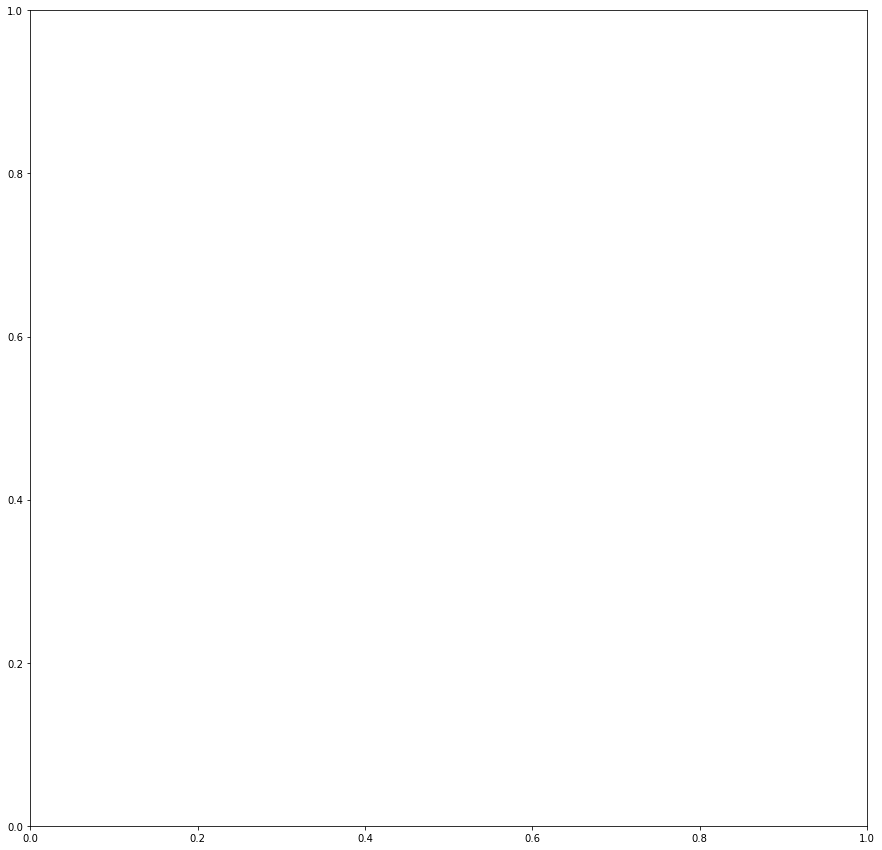

In [68]:
plt.figure(figsize = (15,15))
plt.subplot(1,1,1)
sns.countplot(x = "State", hue = "ServiceCount", data = df)
plt.show()

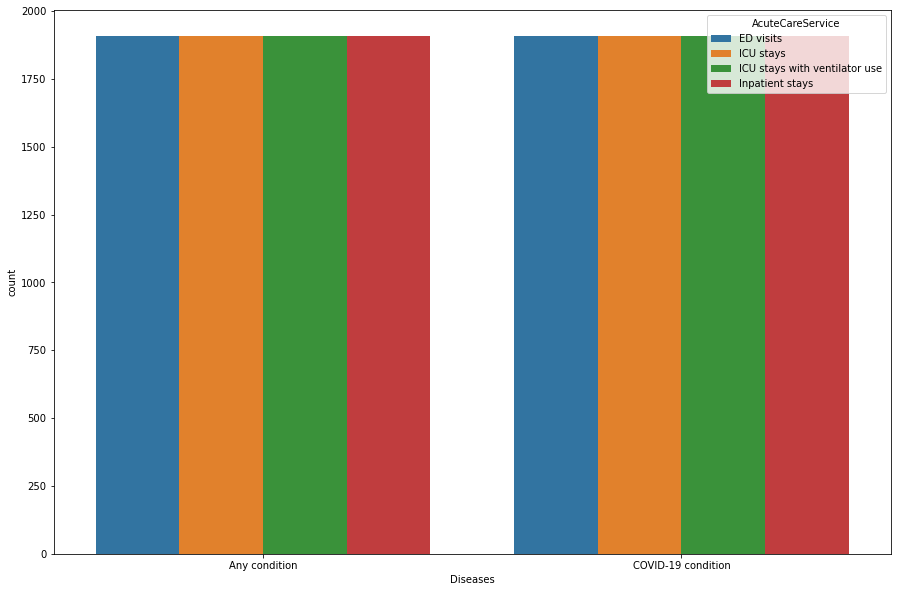

In [ ]:
plt.figure(figsize = (15,10))
plt.subplot(1,1,1)
sns.countplot(x = "Diseases", hue = "State", data = df)
plt.show()

In [28]:
df['Date'] = df['Year'].loc[0:10] + df['Month'].loc[0:10]

In [40]:
print(df['Date'])
print(df['Year'].loc[0:10] + df['Month'].loc[0:10])

0        2019.0
1        2019.0
2        2019.0
3        2019.0
4        2019.0
          ...  
15259       NaN
15260       NaN
15261       NaN
15262       NaN
15263       NaN
Name: Date, Length: 15264, dtype: float64
0     2019
1     2019
2     2019
3     2019
4     2019
5     2019
6     2019
7     2019
8     2020
9     2020
10    2020
dtype: int64


In [ ]:
for x in df['Month']:
    i = str(x)
    l = len(i)
    df['Month'].replace(x,int(i[l - 2:]), inplace = True)
    #df['Month'] = int(i[l - 2:])

In [ ]:
df.info()

In [ ]:
df['Date'] = df['Year'] + '-' + df['Month']

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report.to_file(f'{data_html}.html')

In [ ]:
for x in df['INCIDENT_ADDRESS']:
    df_list.append(x)